## Final Part 2 - BRT wards social attitudes


In this notebook I only look at the data for those wards where over 40% of people use the BRT

In [1]:
# Importing all packages that will be necessary for the data exploration 

# Importing the pandas library 
import pandas as pd

#For creating or removing a directory folder
import os

#To allow me to work with numerical data
import numpy as np

# for spatial data
import geopandas as gpd

# for plotting
import matplotlib.pyplot as plt

# for network analysis
import networkx as nx

# for street network analysis
import osmnx as ox

# for basemaps
import contextily as ctx

import plotly.express as px

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


Import all the necessary files

In [2]:
wards_shp=gpd.read_file("MDB_Wards_2020.shp")

In [3]:
qol17=pd.read_csv('qol17_social attitudes_BRT.csv')

In [4]:
qol11=pd.read_csv('qol11_social_attitudes_BRT.csv')

In [5]:
wards_shp['WardID'] = wards_shp['WardID'].astype(int)

In [6]:
wards_mer_17 = wards_shp.merge(qol17, on='WardID')

In [7]:
wards_mer_11 = wards_shp.merge(qol11, on='WardID')

In [8]:
BRT_lines=gpd.read_file("Gauteng_BRT_lines.shp")

Viewing the merged files, so that I can see how the information is being processed in python

In [9]:
wards_mer_17.head()

,FID,Province,Municipali,CAT_B,WardNo,District,DistrictCo,Date,WardID,WardLabel,Shape__Are,Shape__Len,geometry,att_foreign_mean,bw_trust_mean
0,2907,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,12,City of Johannesburg,JHB,2020-11-26,79800012,JHB_12,2.946026e+06,9074.125581,"POLYGON ((27.85868 -26.27761, 27.86215 -26.279...",0.206897,1.327586
1,2920,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,25,City of Johannesburg,JHB,2020-11-26,79800025,JHB_25,6.353437e+06,13960.331713,"POLYGON ((27.91362 -26.24990, 27.91389 -26.249...",0.225806,1.129032
2,2925,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,30,City of Johannesburg,JHB,2020-11-26,79800030,JHB_30,2.594644e+06,8705.333233,"POLYGON ((27.92508 -26.23825, 27.92508 -26.238...",0.357143,1.035714
3,2926,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,31,City of Johannesburg,JHB,2020-11-26,79800031,JHB_31,2.604056e+06,10345.935582,"POLYGON ((27.92653 -26.22928, 27.92691 -26.229...",0.196078,1.235294
4,2928,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,33,City of Johannesburg,JHB,2020-11-26,79800033,JHB_33,3.900634e+06,10812.953517,"POLYGON ((27.85990 -26.25643, 27.85992 -26.257...",0.131148,1.180328


In [10]:
wards_mer_11.head()

,FID,Province,Municipali,CAT_B,WardNo,District,DistrictCo,Date,WardID,WardLabel,Shape__Are,Shape__Len,geometry,att_foreign_mean,bw_trust_mean
0,2907,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,12,City of Johannesburg,JHB,2020-11-26,79800012,JHB_12,2.946026e+06,9074.125581,"POLYGON ((27.85868 -26.27761, 27.86215 -26.279...",0.200000,1.363636
1,2920,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,25,City of Johannesburg,JHB,2020-11-26,79800025,JHB_25,6.353437e+06,13960.331713,"POLYGON ((27.91362 -26.24990, 27.91389 -26.249...",0.186047,1.600000
2,2925,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,30,City of Johannesburg,JHB,2020-11-26,79800030,JHB_30,2.594644e+06,8705.333233,"POLYGON ((27.92508 -26.23825, 27.92508 -26.238...",0.081081,0.947368
3,2926,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,31,City of Johannesburg,JHB,2020-11-26,79800031,JHB_31,2.604056e+06,10345.935582,"POLYGON ((27.92653 -26.22928, 27.92691 -26.229...",0.162162,1.120000
4,2928,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,33,City of Johannesburg,JHB,2020-11-26,79800033,JHB_33,3.900634e+06,10812.953517,"POLYGON ((27.85990 -26.25643, 27.85992 -26.257...",0.205882,0.901961


I know that I want to add basemaps, so I will project the data to web mercator

In [11]:
wards_mer_17_web_mercator = wards_mer_17.to_crs(epsg=4326)

In [12]:
wards_mer_11_web_mercator = wards_mer_11.to_crs(epsg=4326)

In [13]:
BRT_lines_web_mercator=BRT_lines.to_crs(epsg=4326)

## Mapping attitudes towards foreigners 2017 in BRT wards

I want to map my two variables in the BRT wards, ideally with a side-by-side map (to show changes from 2011 t0 2017), layer the BRT lines on top and add a basemap. 

/opt/conda/lib/python3.9/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 28 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


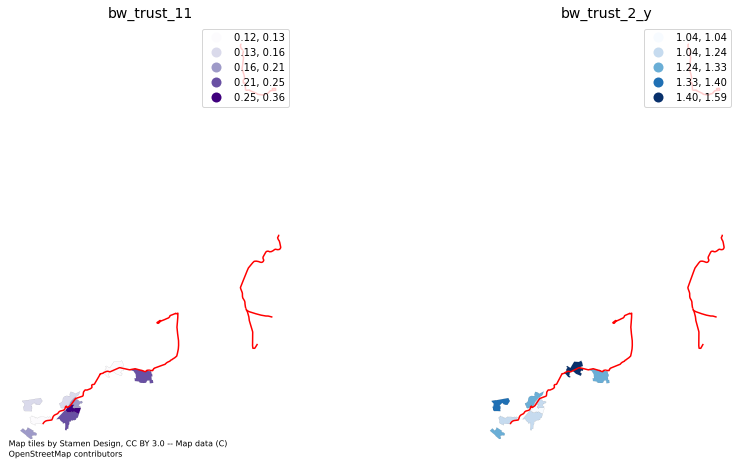

In [22]:
column1 = 'bw_trust_11'
column2 = 'bw_trust_2_y'
fig,ax = plt.subplots(1,2,figsize=(15,8))

base = wards_mer_17_web_mercator.plot(ax=ax[0],
                 column='att_foreign_mean',
                 legend=True,
                 scheme='NaturalBreaks',
              cmap='Purples', edgecolor='black', linewidth=0.05)
BRT_lines_web_mercator.plot(ax=base,
               color='red',
               markersize=10,
                   legend=False,
               zorder=1)


ax[0].set_title(column1, fontsize=14)
ax[0].axis('off');

base2 = wards_mer_17_web_mercator.plot(ax=ax[1],
                 column='bw_trust_mean',
                 legend=True,
                 scheme='NaturalBreaks',
              cmap='Blues', edgecolor='black', linewidth=0.05)

BRT_lines_web_mercator.plot(ax=base2,
               color='red',
               markersize=10,
                   legend=False,
               zorder=1)


ax[1].set_title(column2, fontsize=14)
ax[1].axis('off');

# add a basemap
ctx.add_basemap(ax[0],source=ctx.providers.Stamen.TonerLite)

I seem to be having some trouble with adding the basemap and BRT lines. I circumvent this by mapping them out individually and leaving out the BRT lines.This still gives me an idea of what the variation is for those wards in which there are many BRT users. 

/opt/conda/lib/python3.9/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 30 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


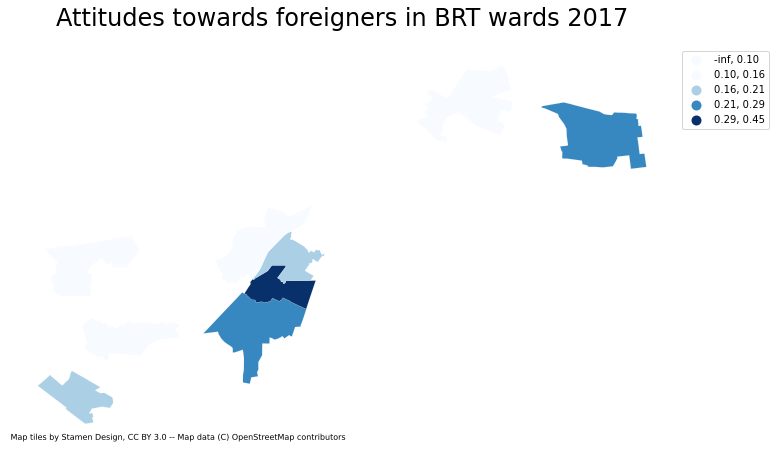

In [19]:
ax=wards_mer_17_web_mercator.plot(figsize=(12,10),
                 column='att_foreign_mean',
                 legend=True,
                  scheme='user_defined',
                                  classification_kwds={'bins': [0.1, 0.16, 0.21, 0.29, 0.45]},
              cmap='Blues', edgecolor='white', linewidth=0.1,
                            legend_kwds={'loc':'upper left','bbox_to_anchor':(1,1)})  

ax.axis('off')

ax.set_title('Attitudes towards foreigners in BRT wards 2017',fontsize=24, pad=20)

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.Stamen.TonerLite)


What we can see here, is that there is some variation, however much less than for the whole region (by looking at the legend). I have also decided to use a different colour scheme, as it may otherwise be confusing when comparing with the previous maps.

I now do the same for the BW trust variable

/opt/conda/lib/python3.9/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 30 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


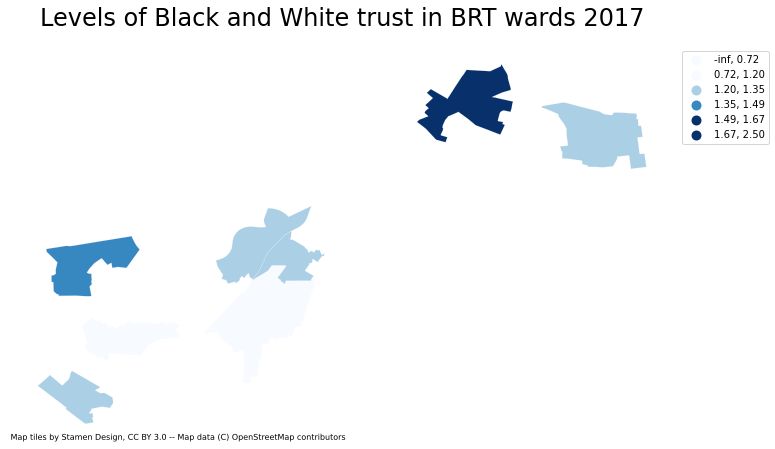

In [16]:
ax=wards_mer_17_web_mercator.plot(figsize=(12,10),
                 column='bw_trust_mean',
                 legend=True,
                 scheme='user_defined',
                                  classification_kwds={'bins': [0.72, 1.2, 1.35, 1.49, 1.67, 2.5]},
              cmap='Blues', edgecolor='white', linewidth=0.1,
                            legend_kwds={'loc':'upper left','bbox_to_anchor':(1,1)})  

ax.axis('off')

ax.set_title('Levels of Black and White trust in BRT wards 2017',fontsize=24, pad=20)

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.Stamen.TonerLite)

Similarly as the map above, we can see a lot less variation, however given that there are so few wards with >=40% of the population use BRT, it is difficult to make any concrete analysis. To make comparisons easier, I have used the same legend as in the overall BW trust map in Gauteng for 2017

## Social Attitudes variables in 2011

I conduct the same analysis for the data in 2011

/opt/conda/lib/python3.9/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 30 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


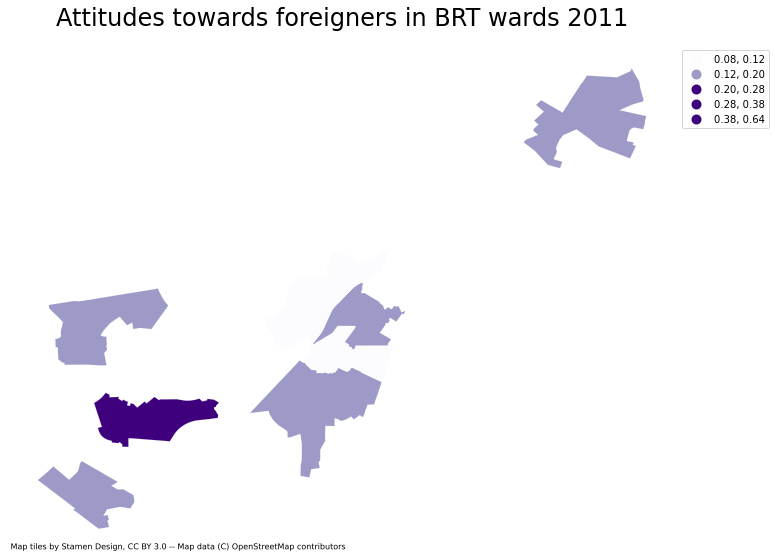

In [17]:
ax=wards_mer_11_web_mercator.plot(figsize=(12,10),
                 column='att_foreign_mean',
                 legend=True,
                 scheme='user_defined',
                                  classification_kwds={'bins': [0.12, 0.2, 0.28, 0.38, 0.64]},
              cmap='Purples', edgecolor='white', linewidth=0.1,
                            legend_kwds={'loc':'upper left','bbox_to_anchor':(1,1)})  

ax.axis('off')

ax.set_title('Attitudes towards foreigners in BRT wards 2011',fontsize=24, pad=20)

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.Stamen.TonerLite)


/opt/conda/lib/python3.9/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 30 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


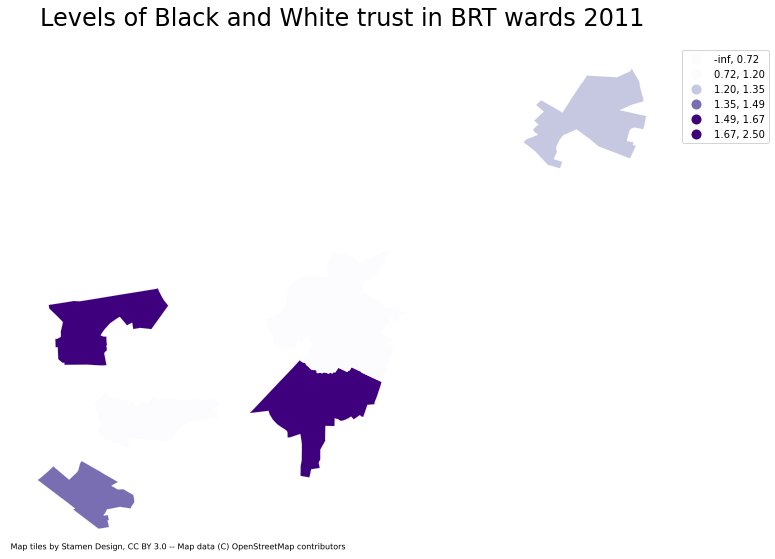

In [18]:
ax=wards_mer_11_web_mercator.plot(figsize=(12,10),
                 column='bw_trust_mean',
                 legend=True,
                scheme='user_defined',
                                  classification_kwds={'bins': [0.72, 1.2, 1.35, 1.49, 1.67, 2.5]},
              cmap='Purples', edgecolor='white', linewidth=0.1,
                            legend_kwds={'loc':'upper left','bbox_to_anchor':(1,1)})  

ax.axis('off')

ax.set_title('Levels of Black and White trust in BRT wards 2011',fontsize=24, pad=20)

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.Stamen.TonerLite)


I can now see whether BRT use (vs just the location of the BRT makes any difference on social attitudes